# Self Study 1

This self study sheet contains some code, and some questions. You should first walk through the code, and then work on the questions. The questions can be answered by extending this notebook with some additional code and text ("markdown") cells. A brief guide to formatting in markdown cells is here:<br>
https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed<br>


The following just gives us some tools we'll need

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVC

In [2]:
# A small utility we shall need later:
def maxpos(A):
    '''
    Takes an n x k array A, and returns 1-dim n array where the i'th
    entry is the index of column in A where the i'th row of A has its
    maximal value (application: turns a probabilitiy distribution over
    k classes for n instances into a single prediction)
    '''
    return np.argmax(A,axis=1)
    

We load the Iris dataset and inspect what it is about. Iris is probably the most heavily used dataset in machine learning. It even has its own Wikipedia page: https://en.wikipedia.org/wiki/Iris_flower_data_set

In [3]:
irisdata = load_iris()

print(irisdata.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

The Iris data contains 4 features. In order to facillitate visualization of decision regions,
it is better to use two features only, that then can be plotted in 2D. Here we select
two features, and make a scatter plot of their values:

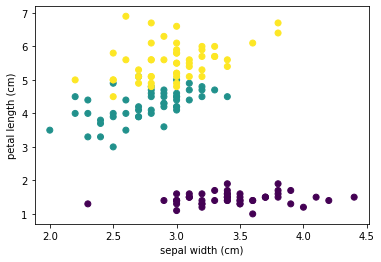

In [4]:
feat1 = 1
feat2 = 2
plt.scatter(irisdata.data[:,feat1],irisdata.data[:,feat2],c=irisdata.target)
plt.xlabel(irisdata['feature_names'][feat1])
plt.ylabel(irisdata['feature_names'][feat2])
plt.show()

We next define and train several classification models. We continue to only use the first two features of the data.

First, the **K nearest neighbor** model. To define the model, we have to select the value of K, here called n_neighbors. The .fit function is the generic function for model training. For the K nearest neighbor model there is no actual training, however. 

In [5]:
irisknn = KNeighborsClassifier(n_neighbors=3)
irisknn.fit(irisdata.data[:,[feat1,feat2]],irisdata.target)


KNeighborsClassifier(n_neighbors=3)

The following defines three different linear models (Linear regression, logistic regression, linear support vector machine) that we will study in more detail in the following lectures. For now we need to know that for each of the models we first specify the desired model class, and then fit (or 'train', or 'learn') the model based on our labeled training data. The linear regression model requires the label information in a different format from the other two models, which is why we first construct the 'one hot encoding' representation. After the models have been fitted, they each define a linear decision boundary, and can classify unlabeled examples. 

In [6]:
onehotclasses = np.zeros((irisdata.target.size,3))
for i in range(irisdata.target.size): 
    onehotclasses[i][irisdata.target[i]]=1.0
irislinreg = LinearRegression()
irislinreg.fit(irisdata.data[:,[feat1,feat2]],onehotclasses)

irislogreg = LogisticRegression()
irislogreg.fit(irisdata.data[:,[feat1,feat2]],irisdata.target)

irislinsvc = SVC(kernel='linear')
irislinsvc.fit(irisdata.data[:,[feat1,feat2]],irisdata.target)


SVC(kernel='linear')

Plotting labeled data points and decision regions. First, a meshgrid is constructed consisting of a fine grid of points that we classify, and then use for visualization of the decision regions. Then, our classifier is applied to the grid (uncomment the pair of lines you want for either knn or one of the linear models).


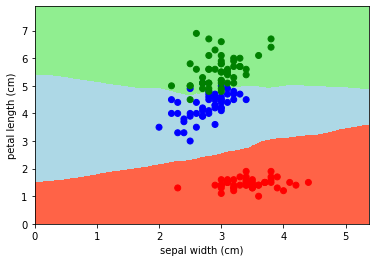

In [7]:
maxval1 = np.max(irisdata.data[:,feat1])
maxval2 = np.max(irisdata.data[:,feat2])

xx, yy = np.meshgrid(np.arange(0, maxval1+1, 0.02), np.arange(0, maxval2+1, 0.02))

Z = irisknn.predict(np.c_[xx.ravel(), yy.ravel()])
meshclasses = Z

# Z = irislinreg.predict(np.c_[xx.ravel(), yy.ravel()])
# meshclasses = maxpos(Z)

# Z = irislogreg.predict(np.c_[xx.ravel(), yy.ravel()])
# meshclasses = Z

# Z = irislinsvc.predict(np.c_[xx.ravel(), yy.ravel()])
# meshclasses = Z


meshclasses = meshclasses.reshape(xx.shape)
plt.contourf(xx,yy,meshclasses,[-0.1,0.1,1,2],colors=('tomato','lightblue','lightgreen'))
plt.scatter(irisdata.data[:,feat1],irisdata.data[:,feat2],c=irisdata.target, cmap = mpl.colors.ListedColormap(['r', 'b', 'g']))
plt.xlabel(irisdata['feature_names'][feat1])
plt.ylabel(irisdata['feature_names'][feat2])
plt.show()

**Exercise 1** Visualize and describe the decision boundaries obtained from the KNN classifier and the linear regression classifier. Use different values of K in the KNN classifier, and also consider different selections of predictive features (see explanations in the code). This does not require any extension of the code.

- The KNN classifier has a decision boundary are not straight lines, but rather a smoother curve. This is done by measuring each point and seen which number of neighbors are closest and what label these neighbors have. When changing the number K the lines become less of more smooth.

![KNN](imgs\KNN.png)

- The linear regression classifier has a decision boundary that is a straight line. This is done by measuring the distance of each point from the decision boundary. The results from this is very different from the KNN classifier, since it meets in the middle and cut of a significant part of the blue label.

![Linear Regression](imgs\LinReg.png)

- The logarithmic regression classifier has a decision boundary that follows the knn much more than the Linear regression classifier. The major difference between knn and LogReg is that LogReg uses straight lines to classify the data, while knn uses a  smoother curve.

![LogReg](imgs\LogReg.png)

- The linear support vector machine seems to be very similar to the knn and the logreg, but it is slightly more slanted than the other two

![Linear SVM](imgs\LinSvc.png)

**Exercise 2:** Divide the data into 70% training and 30% test data. Learn KNN and linear regression classifiers from the training data, and evaluate their accuracy both on the training and test data. For the KNN classifier,
draw the curves that show train/test accuracy as a function of K. Useful sklearn functions:<br>
`sklearn.model selection.train test split`<br>
`sklearn.metrics.accuracy score`<br>
`sklearn.metrics.confusion matrix`

In [8]:
X_train, X_test ,Y_train, Y_test= train_test_split(irisdata.data, irisdata.target, test_size=0.30)

irisknn = KNeighborsClassifier(n_neighbors=3)
irisknn.fit(X_train[:,[feat1,feat2]],Y_train)

print("KNN training accuracy "+ str(irisknn.score(X_train[:,[feat1,feat2]],Y_train)))
print("KNN test accuracy " + str(irisknn.score(X_test[:,[feat1,feat2]],Y_test)))

from sklearn.metrics import confusion_matrix, accuracy_score

y_train_preds_knn = irisknn.predict(X_train[:,[feat1,feat2]])
accuracy_score(Y_train,y_train_preds_knn)

KNN training accuracy 0.9714285714285714
KNN test accuracy 0.9333333333333333


0.9714285714285714

In [9]:
onehotclasses_train = np.zeros((Y_train.size,3))
for i in range(Y_train.size): 
    onehotclasses_train[i][Y_train[i]]=1.0

onehotclasses_test = np.zeros((Y_test.size,3))
for i in range(Y_test.size): 
    onehotclasses_test[i][Y_test[i]]=1.0

irislinreg = LinearRegression()
irislinreg.fit(X_train[:,[feat1,feat2]],onehotclasses_train)

print("LinReg training accuracy "+ str(irislinreg.score(X_train[:,[feat1,feat2]],onehotclasses_train)))
print("LinReg test accuracy "+ str(irislinreg.score(X_test[:,[feat1,feat2]],onehotclasses_test)))
from sklearn.metrics import confusion_matrix, accuracy_score
y_train_preds = irislinreg.predict(X_train[:,[feat1,feat2]])
accuracy_score(Y_train, np.argmax(y_train_preds, axis=1))


LinReg training accuracy 0.5389800617489875
LinReg test accuracy 0.5994363579687497


0.7904761904761904

KNN plot showing the training data as circles and the test data as triangles


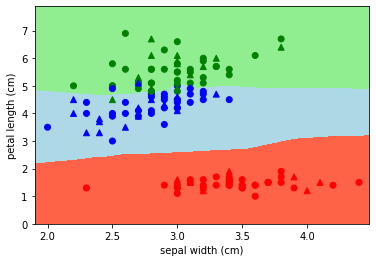

In [10]:
maxval1 = np.max(X_train[:,feat1])
maxval2 = np.max(X_train[:,feat2])

xx, yy = np.meshgrid(np.arange(1.9, maxval1+0.1, 0.02), np.arange(0, maxval2+1, 0.02))

Z = irisknn.predict(np.c_[xx.ravel(), yy.ravel()])
meshclasses = Z

meshclasses = meshclasses.reshape(xx.shape)
plt.contourf(xx,yy,meshclasses,[-0.1,0.1,1,2],colors=('tomato','lightblue','lightgreen'))
plt.scatter(X_train[:,feat1],X_train[:,feat2],c=Y_train, cmap = mpl.colors.ListedColormap(['r', 'b', 'g']))
plt.scatter(X_test[:,feat1],X_test[:,feat2],c=Y_test,marker="^", cmap = mpl.colors.ListedColormap(['r', 'b', 'g']))
plt.xlabel(irisdata['feature_names'][feat1])
plt.ylabel(irisdata['feature_names'][feat2])
print("KNN plot showing the training data as circles and the test data as triangles")
plt.show()

linear regression plot showing the training data as circles and the test data as triangles


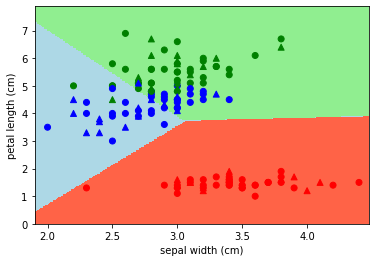

In [11]:
Z = irislinreg.predict(np.c_[xx.ravel(), yy.ravel()])
meshclasses = maxpos(Z)

meshclasses = meshclasses.reshape(xx.shape)
plt.contourf(xx,yy,meshclasses,[-0.1,0.1,1,2],colors=('tomato','lightblue','lightgreen'))
plt.scatter(X_train[:,feat1],X_train[:,feat2],c=Y_train, cmap = mpl.colors.ListedColormap(['r', 'b', 'g']))
plt.scatter(X_test[:,feat1],X_test[:,feat2],c=Y_test,marker="^", cmap = mpl.colors.ListedColormap(['r', 'b', 'g']))
plt.xlabel(irisdata['feature_names'][feat1])
plt.ylabel(irisdata['feature_names'][feat2])
print("linear regression plot showing the training data as circles and the test data as triangles")
plt.show()

**Exercise 3:**  Also perform (some) of the previous experiments using the full set of 4 predictive features. How does that
change the classification performance? Which of the 3 Iris classes is easiest to classify? Why?

In [12]:
irisknn = KNeighborsClassifier(n_neighbors=3)
irisknn.fit(X_train,Y_train)

print("KNN training accuracy "+ str(irisknn.score(X_train,Y_train)))
print("KNN test accuracy " + str(irisknn.score(X_test,Y_test)))

from sklearn.metrics import confusion_matrix, accuracy_score

y_train_preds_knn = irisknn.predict(X_train)
accuracy_score(Y_train,y_train_preds_knn)

KNN training accuracy 0.9904761904761905
KNN test accuracy 0.9555555555555556


0.9904761904761905

In [13]:
irislinreg = LinearRegression()
irislinreg.fit(X_train,onehotclasses_train)

print("LinReg training accuracy "+ str(irislinreg.score(X_train,onehotclasses_train)))
print("LinReg test accuracy "+ str(irislinreg.score(X_test,onehotclasses_test)))
from sklearn.metrics import confusion_matrix, accuracy_score
y_train_preds = irislinreg.predict(X_train)
accuracy_score(Y_train, np.argmax(y_train_preds, axis=1))

LinReg training accuracy 0.5793480953238612
LinReg test accuracy 0.6168568074034757


0.8476190476190476

When running the experiment with all of the features it does not seems to change the classification performance. the easiest class to classify is the Iris-setosa. Assumed the be the red datapoints. The reason why is somewhat obvious at a glance as the red dots are very isolated of the graph when compared to the green and blue dots.